# **Analyzing Indian Start-Up Funding Trends (2018 - 2021)**

----

### Team Namibia

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Data Preparation**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 



## Step 1: Business Understanding
Team Namibia aims to venture into the start-up space in India and being the data expert of the team, we've have been tasked with investigating the econmoic landscape and coming out with a course of action for this endeavour.


#### Problem Statement:
Investigating the dynamics of startup funding in India over the period from 2018 to 2021. The aim is to understand the trends, sector preferences, investment stages, key investors, and geographical distribution of the funding. Additionally, if there have been significant differences in funding amounts across different years and sectors, it can guide the action plan to be taken.

#### Objective
The goal of this analysis is to provide insights into the startup funding landscape in India from 2018 to 2021. 
- Identify trends and patterns in funding amounts over the years.
- Determine which sectors received the most funding and how sector preferences changed over time.
- Understand the distribution of funding across different stages of startups (e.g., Seed, Series A).
- Identify key investors and their investment behaviors.
- Analyze the geographical distribution of funding within India.

#### Analytical Questions
1. What are the trends and patterns in funding amounts for startups in India beetween 2018 to 2021?
   - Analyzing the annual and quarterly trends in funding can reveal patterns and growth trajectories. Look for peaks, dips, and any consistent growth patterns over these years.
2. Which sectors received the most funding, and how did sector preferences change over time from 2018 to 2021?
   - Identifying which industries or sectors received the most funding can show sectoral preferences and shifts. Understanding how this distribution has evolved over the years can highlight emerging trends and declining interests.
3. How is the distribution of funding across different stages of startups (e.g., Seed, Series A)?
   - Analyzing the funding amounts at different startup stages can provide insights into the investment appetite at various growth phases. It can also help in understanding the maturity and risk preference of investors.
4. Who are the key investors in Indian startups, and what are their investment behaviors/patterns?
   - Identifying the most active investors and analyzing their investment portfolios can shed light on key players in the ecosystem. Understanding their investment patterns can also reveal strategic preferences and alliances.
5. What is the geographical distribution of startup funding within India, and how has this distribution changed over the years 2018 to 2021?
   - Analyzing the geographical distribution of startup funding can show regional hotspots for entrepreneurship and investment. Observing how this has changed over the years can reveal shifts in regional focus and development.



### Null Hypothesis (H0)
There is no significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.

### Alternate Hypothesis (H1)
There is a significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.


## Step 2: Data Understanding

The data from 2018 is obtained from GitHub in csv format, 2019 data is obtained from google drive in csv format and 2020 to 2021 data is obtained from an SQL database.

### Load Data

#### Install pyodbc and python-dotenv if necessary

In [1]:
# For creating a connection
!pip install pyodbc 

# For loading environment variables
!pip install python-dotenv  

# For creating visualizations
!pip install matplotlib
!pip install seaborn

# For statistical model analysis
!pip install statsmodels

#### Import the necessary packages

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Import Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import re for string manipulation (searching, matching, and modifying strings based on specific patterns)
import re

# Import for statistical model analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Establishing a connection to the SQL database

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('database')
server = environment_variables.get('server')
username = environment_variables.get('login')
password = environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load 2020 Data

In [5]:
query1 = 'Select * from dbo.LP1_startup_funding2020'
df_2020 = pd.read_sql(query1, connection)
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Load 2021 Data

In [6]:
query2 = 'Select * from dbo.LP1_startup_funding2021'
df_2021 = pd.read_sql(query2, connection)
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Load 2018 Data

In [7]:
df_2018 = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\indian_startup_funding_analysis\Indian-StartUp-Funding-Analysis\data\raw\startup_funding2018.csv')
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Load 2019 Data

In [8]:
df_2019 = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\indian_startup_funding_analysis\Indian-StartUp-Funding-Analysis\data\raw\startup_funding2019.csv')
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Rename the columns to match for easier consolidation

In [9]:
# Rename 2018 column: 'Round/Series' to 'Funding Stage'
df_2018 = df_2018.rename(columns = {'Round/Series': 'Funding Stage'})

# Rename 2019 columns
df_2019 = df_2019.rename(columns = {'Company/Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'Amount($)': 'Amount', 'HeadQuarter': 'Location', 'What it does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2020 columns
df_2020 = df_2020.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2021 columns
df_2021 = df_2021.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

#### Save all the data in one DataFrame

In [10]:
# Add a column to each DataFrame to indicate the year
df_2018['Year Funded'] = 2018
df_2019['Year Funded'] = 2019
df_2020['Year Funded'] = 2020
df_2021['Year Funded'] = 2021

# Concatenate all DataFrames into one master DataFrame
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Print out the new DataFrame to confirm the combination was done correctly
df.head()

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2879 non-null   object 
 1   Industry       2861 non-null   object 
 2   Funding Stage  1941 non-null   object 
 3   Amount         2622 non-null   object 
 4   Location       2765 non-null   object 
 5   About Company  2879 non-null   object 
 6   Year Funded    2879 non-null   int64  
 7   Year Founded   2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


### Data Preparation

#### Initial Observations:
- Some null values are presented as '-'
- Duplicates are presented
- Errors in data entry (some entries are in the wrong columns)
- The 'Location' and 'Industry' columns contains multiple values
- Columns renamed
- A new column 'Year Funded' was created to represented the year the companies were received funding
- 2018 Data has no data in the following columns: 'Year Founded', 'Founders', 'Investor'
- Datatype correction required in the 'Amount' column
- Multiple currencies found in the 'Amount' column: Dollars and Rupees


#### Cleaning Overview:
- Duplicates removed
- The Rupees in the 'Amount' column was converted to Dollars
- Using dictionaries to correct for wrongly placed data
- The 'Location' column was split into 3 columns (City, State and Country)
    - 'State' and 'Country' column was removed 
    - The 'City' column was joined to the dataset and renamed to 'Location' while the intial 'Location' column was removed.
    - 4 rows with 'Location' as 'India, Asia' was removed
- The 'Industry' column was split into multiple columns. All the columns were removed except the one with no null values.
- In the 'Company' name column a link was changed to the company's name.


In [12]:
# Check for the number of rows and columns (shape)
df.shape

(2879, 11)

#### Review and Remove Duplicates

In [13]:
# Check for duplicates
df.duplicated().sum()

23

In [14]:
# Check for duplicates
duplicates = df.duplicated(keep = False)

# Review the duplicates
dupes = df[duplicates]
dupes

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
735,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
744,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
760,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
820,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
941,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
977,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
1764,Curefoods,Food & Beverages,None,$13000000,Bangalore,Healthy & nutritious foods and cold pressed ju...,2021,2020.0,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",NaN
1766,Bewakoof,Apparel & Fashion,None,$8000000,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2021,2012.0,Prabhkiran Singh,InvestCorp,NaN


In [15]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm the new shape. Rows should be less by 23
df.shape

(2856, 11)

#### Clean rows with misplaced column entires

- Check for values in the columns to identify some of the misplaced data
- Select the rows with the values identified as misplaced
- Investigate the other entires in the rows for further insight
- Create dictionaries to correct the data


In [16]:
# Find unique values in the 'Funding Stage' column
unique_fundstage_values = df['Funding Stage'].unique()

# Print the unique values
print(unique_fundstage_values)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' None 'Pre-seed' 'Pre-series' 'Debt'
 'Pre-series C' 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge'
 'Pre-Series B' 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'S

In [17]:
# Define the specific entries you want to look up
specific_fundstage_entries = ['https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'Edge', 'PE', '$1200000', '$300000', '$6000000', '$1000000']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_fundstage_rows = df[df['Funding Stage'].isin(specific_fundstage_entries)]
specific_fundstage_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...,2018,NaN,NaN,NaN,NaN
1022,EkAnek,Tech Startup,Edge,5040000.0,New Delhi,EkAnek Networks is a new startup that is focus...,2020,2018.0,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",None
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
2114,boAt,Fashion & Lifestyle,PE,"$100,000,000",Mumbai,boAt is a lifestyle brand that deals in fashio...,2021,2016.0,"Aman Gupta, Sameer Mehta","InnoVen Capital, InnoVen Capita",NaN
2208,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,Soft Skills that make Smart Leaders,2021,2020.0,Holistic Development Programs for children in ...,Vishal Gupta,NaN
2221,BHyve,Human Resources,$300000,"ITO Angel Network, LetsVenture",Mumbai,A Future of Work Platform for diffusing Employ...,2021,2020.0,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN
2344,MYRE Capital,Commercial Real Estate,$6000000,None,Mumbai,Democratising Real Estate Ownership,2021,2020.0,Own rent yielding commercial properties,Aryaman Vir,NaN
2347,Saarthi Pedagogy,EdTech,$1000000,"JITO Angel Network, LetsVenture",Ahmadabad,"India's fastest growing Pedagogy company, serv...",2021,2015.0,Pedagogy,Sushil Agarwal,NaN


In [18]:
# Find unique values in the 'Location' column
unique_location_values = df['Location'].unique()

# Print the unique values
print(unique_location_values)

['Bangalore, Karnataka, India' 'Mumbai, Maharashtra, India'
 'Gurgaon, Haryana, India' 'Noida, Uttar Pradesh, India'
 'Hyderabad, Andhra Pradesh, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'Delhi, Delhi, India' 'India, Asia'
 'Hubli, Karnataka, India' 'New Delhi, Delhi, India'
 'Chennai, Tamil Nadu, India' 'Mohali, Punjab, India'
 'Kolkata, West Bengal, India' 'Pune, Maharashtra, India'
 'Jodhpur, Rajasthan, India' 'Kanpur, Uttar Pradesh, India'
 'Ahmedabad, Gujarat, India' 'Azadpur, Delhi, India'
 'Haryana, Haryana, India' 'Cochin, Kerala, India'
 'Faridabad, Haryana, India' 'Jaipur, Rajasthan, India'
 'Kota, Rajasthan, India' 'Anand, Gujarat, India'
 'Bangalore City, Karnataka, India' 'Belgaum, Karnataka, India'
 'Thane, Maharashtra, India' 'Margão, Goa, India'
 'Indore, Madhya Pradesh, India' 'Alwar, Rajasthan, India'
 'Kannur, Kerala, India' 'Trivandrum, Kerala, India'
 'Ernakulam, Kerala, India' 'Kormangala, Karnataka, India'
 'Uttar Pradesh, India, Asia' 'Andhe

In [19]:
# Define the specific entries you want to look up
specific_location_entries = ['Computer Games', 'Online Media\t#REF!', 'Information Technology & Services', 'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_location_rows = df[df['Location'].isin(specific_location_entries)]
specific_location_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
1911,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,A ready-to-cook Asian cuisine brand,2021,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures,NaN
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN
2846,Peak,"Manchester, Greater Manchester",Series C,$75000000,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2,NaN


In [20]:
# Find unique values in the 'Industry' column
unique_industry_values = df['Industry'].unique()

# Print the unique values
print(unique_industry_values)

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [21]:
# Define the specific entries you want to look up
specific_industry_entries = ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience', 'Hauz Khas', 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.',"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.", 'Manchester, Greater Manchester']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_industry_rows = df[df['Industry'].isin(specific_industry_entries)]
specific_industry_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1911,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,A ready-to-cook Asian cuisine brand,2021,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures,NaN
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN
2846,Peak,"Manchester, Greater Manchester",Series C,$75000000,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2,NaN


In [22]:
# Define the specific entries you want to look up
specific_amount_entries = ['Seed', 'Pre-series A']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_amount_rows = df[df['Amount'].isin(specific_amount_entries)]
specific_amount_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2215,AdmitKard,EdTech,None,Pre-series A,Noida,A tech solution for end to end career advisory...,2021,2016.0,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN
2818,Godamwale,Logistics & Supply Chain,None,Seed,Mumbai,Godamwale is tech enabled integrated logistics...,2021,2016.0,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN


In [23]:
# Updating specific indexes with correct values (Funding Stage)
df.at[1927, 'Funding Stage'] = 'Seed'
df.at[2215, 'Funding Stage'] = 'Pre-series A'
df.at[2818, 'Funding Stage'] = 'Seed'

# Updating specific indexes with correct values (Amount) 
df.at[1927, 'Amount'] = 5000000
df.at[2215, 'Amount'] = 1000000
df.at[2818, 'Amount'] = 1000000
df.at[1912, 'Amount'] = 22000000

In [24]:
# Define the replacement dictionary for 'Industry' column
industry_replacements = {
    'Manchester, Greater Manchester': 'Information Technology & Services',
    'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience': 'Audio',
    'Hauz Khas': 'Food & Beverages',
    'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.': 'Healthcare',
    "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.": 'Transportation'
}

# Define the replacement dictionary for 'Funding Stage' column
funding_stage_replacements = {
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593': np.nan,
    'Edge': np.nan,
    '$1200000': np.nan,
    'PE': np.nan,
    '$300000': np.nan,
    '$300000': 'Angel',
    '$6000000': np.nan,
    '$1000000': 'Angel'   
}

# Define the replacement dictionary for 'Amount' column
amount_replacements = {
    'Upsparks': np.nan,
    'ah! Ventures': 300000,
    'ITO Angel Network, LetsVenture': 300000,
    'None': np.nan,
    'JITO Angel Network, LetsVenture': 1000000
}

# Define replacement dictionary for 'Location' column
location_replacements = {
    'Online Media\t#REF!': np.nan,
    'Information Technology & Services': np.nan,
    'Food & Beverages': np.nan,
    'Pharmaceuticals\t#REF!': np.nan,
    'Gurugram\t#REF!': 'Gurugram',
    'Computer Games': np.nan

}

# Define replacement dictionary for 'Investor' column
investor_replacements = {
    '$Undisclosed': np.nan,
    '$22000000': np.nan,
    '$5000000': np.nan,
    '$1000000': np.nan,
    '1000000\t#REF!': np.nan
}


# Apply replacements
df['Industry'] = df['Industry'].replace(industry_replacements)
df['Funding Stage'] = df['Funding Stage'].replace(funding_stage_replacements)
df['Amount'] = df['Amount'].replace(amount_replacements)
df['Location'] = df['Location'].replace(location_replacements)
df['Investor'] = df['Investor'].replace(investor_replacements)

In [25]:
# Perform a random selection to check for misplaced data
# Select 80% of the rows randomly
random_rows = df.sample(frac=0.8)
random_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
652,BiteSpeed,E-commerce,Seed,275000.0,Gurgaon,Chat-based commerce for E-commerce brands,2020,2019.0,"Vinayak, Kshitij Abhishek, Apoorv Sadana",Whiteboard Capital,None
751,True Balance,FinTech,None,28000000.0,Gurugram,True Balance is a digital wallet that enables ...,2020,2014.0,"Cheolwon Lee, Jay Yi, Martin Lee","IBK Capital, SB Partners",None
2445,BlackSoil NBFC,FinTech,None,"$3,000,000",Mumbai,BlackSoil Capital has transformed into an alte...,2021,2010.0,Mohinder Pal Bansal,None,NaN
1955,Zepto,E-commerce,None,$100000000,Bangalore,"Ability to consistently deliver 2,500+ product...",2021,2021.0,"Aadit Palicha, Kaivalya Vohra",Y-Combinator,NaN
1986,Hubhopper,Podcast,None,Undisclosed,New Delhi,"Hubhopper is India's leading podcast hosting, ...",2021,2015.0,Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2533,ElasticRun,E-commerce,Series D,"$75,000,000",Pune,ElasticRun develops an online system that impr...,2021,2015.0,"Sandeep Deshmukh, Saurabh Nigam, Shitiz Bansal","Avataar Venture Partners, Kalaari Capital",NaN
1090,Purple Style Labs,Fashion,None,43000.0,Mumbai,Shopping experience and foster the growth of I...,2020,2015.0,Abhishek Agarwal,"Jitendra Gupta, Astarc Ventures.",None
2588,Zenpay Solutions,Financial Services,None,$Undisclosed,New Delhi,"India’s fastest growing fintech company, which...",2021,2019.0,Ankit Bhargava,"The StarupLab, AngelBay",NaN
1184,Magicpin,None,Series D,7000000.0,Gurugram,"It is a local discovery, rewards, and commerce...",2020,2015.0,"Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,None


In [26]:
# Get the summary of the DataFrame (understand structure and contents of the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         2599 non-null   object 
 4   Location       2737 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 332.3+ KB


#### Clean the 'Amount' Column 

- Extract all the symbols and non-numeric values
- Convert Rupees to Dollars
- Drop all non-numeric values and replace them with NaN values
- Convert column to float

In [27]:
# Extract and count currency symbols
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1176
—                148
₹                144
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

#### Convert Rupees to Dollars

In [28]:
# Filter the DataFrame based on the rupee symbol and the year 2018
rupee_2018 = df['Amount'].str.contains('₹', na=False) & (df['Year Funded'] == 2018)

# Perform the calculation only for the filtered rows
df.loc[rupee_2018, 'Amount'] = df.loc[rupee_2018, 'Amount'].str.replace('₹', '').str.replace(',', '').astype(float) * 0.01461   # 1 INR = 0.01461 USD in 2018

In [29]:
# Confirm all rupees have been dropped
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1176
—                148
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

In [30]:
# Convert the 'Amount' column datatype
# Extract unique currency symbols from the 'Amount' column
currency_symbols = df['Amount'].str.extract(r'([^0-9.,])').dropna()[0].unique()

# Print the unique currency symbols
print("Unique Currency Symbols:", currency_symbols)

Unique Currency Symbols: ['—' '$' 'U']


In [31]:
# Remove non-numeric characters from the 'Amount' column
df['Amount'] = df['Amount'].str.replace(r'[$-,U]', '').str.replace(',', '')

# Convert the cleaned strings into numeric values, replacing non-convertible values with NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert the 'Amount' column datatype
df['Amount'] = df['Amount'].astype(float)

# Confirm the datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         174 non-null    float64
 4   Location       2737 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 332.3+ KB


Fill the nulls with the determined Industries (obtained from the "About Company" column)

In [35]:
# Mapping of company names to industries
company_to_industry = {
    "VMate": "Media and Entertainment",
    "Awign Enterprises": "Services (Human Resources)",
    "TapChief": "Services (Consulting / Professional Services)",
    "KredX": "Financial Services",
    "m.Paani": "E-Commerce",
    "Text Mercato": "E-Commerce",
    "Magicpin": "E-Commerce",
	"Leap Club": "E-Commerce",
	"Juicy Chemistry": "Services",
	"Servify": "Retail",
	"Wagonfly": "Media and Entertainment",
	"DrinkPrime": "E-Commerce",
	"Kitchens Centre": "Consumer Durables",
	"Innoviti": "Services",
	"Brick&Bolt": "Financial Services",
	"Toddle": "Real Estate",
	"HaikuJAM": "IT & BPM",
    "MissMalini Entertainment" : "Entertainment and Media",
    "Jagaran Microfin" : "Microfinance",
    "FLEECA" : "Automotive Services",
    "WheelsEMI" : "Financial Services",
    "Fric Bergen" : "Food and Beverage",
    "Deftouch" : "Gaming",
    "Corefactors" : "Marketing",
    "Cell Propulsion" : "Transportation Technology",
    "Flathalt" : "Real Estate",
    "dishq" : "Food Technology",
    "Trell" : "Social Networking",
    "HousingMan.com" : "Real Estate",
    "Steradian Semiconductors" : "Semiconductor Technology",
    "SaffronStays" : "Travel and Hospitality",
    "Inner Being Wellness" : "Beauty and Wellness",
    "MySEODoc" : "Digital Marketing",
    "ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED" : "Digital Marketing",
    "Scale Labs" : "E-commerce Solutions",
    "Roadcast" : "Business Services",
    "Toffee" : "Insurance Technology",
    "ORO Wealth" : "Financial Services",
    "Finwego" : "Financial Services",
    "Cred" : "Financial Services",
    "Origo" : "Agriculture",
    "Sequretek" : "Cyber Security",
    "Avenues Payments India Pvt. Ltd." : "IT Solutions",
    "Planet11 eCommerce Solutions India (Avenue11)" : "Technology",
    "Iba Halal Care" : "Cosmetics",
    "Togedr" : "Activity Discovery and Booking",
    "Scholify" : "Edutech"    
}

# Function to fill missing industries based on company name
def fill_industry(row):
    if pd.isna(row["Industry"]):
        return company_to_industry.get(row["Company Name"], row["Industry"])
    return row["Industry"]

# Apply the function to update the 'Industry' column
df["Industry"] = df.apply(fill_industry, axis=1)

# Checking the Null value in the 'Industry' column
print("Null values in Industry after cleaning:",df['Industry'].isna().sum())

Null values in Industry after cleaning: 0


Extract 1 Industry from the 'Industry' column

In [36]:
# Function to extract the first industry from the 'Industry' column
def industry_extract(row):
    industries = row['Industry'].split(',')
    return industries[0].strip() if len(industries) > 1 else row['Industry']

# Apply the function to update the 'Industry' column
df['new_industry'] = df.apply(industry_extract, axis=1)
    
# Remove "Industry"
df = df.drop(columns=['Industry'])

# Rename "new_industry" to "Industry"
df = df.rename(columns={'new_industry': 'Industry'})

df[["Industry"]].head()

,Industry
0,Brand Marketing
1,Agriculture
2,Credit
3,Financial Services
4,E-Commerce Platforms


In [38]:
unique2= df["Industry"].unique()
unique2

array(['Marketing and Advertising', 'Agriculture and Food',
       'Finance and FinTech', 'Financial Services',
       'E-Commerce and Retail', 'Technology', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Industrial and Manufacturing',
       'Transportation and Mobility', 'Artificial Intelligence',
       'Education', 'Energy and Environment', 'Healthcare and Wellness',
       'Media and Entertainment', '—', 'Consumer Goods',
       'Professional Services', 'Mobile', 'Aerospace',
       'Real Estate and Construction', 'Embedded Systems', 'Beauty',
       '3D Printing', 'Classifieds', 'Enterprise Resource Planning (ERP)',
       'Audio', 'Government', 'Business Intelligence', 'Children',
       'Rental', 'Travel', 'Tourism', 'Analytics', 'Human Resources',
       'Dietary Supplements', 'Collaboration', 'File Sharing', 'Computer',
       'Android', 'Basketball', 'Fraud Detection', 'Wedding', 'Farming',
       'Business Travel', 'D

In [37]:
def sector_redistribution(Industry):
    if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|microfinance|lending|wealth|insurance|mutual fund|funding|invest|neo-bank|online financial service|escrow', Industry, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'e-?commerce|retail|marketplace|e-store|e-tail|e-tailer|consumer|durables|appliances|electronics', Industry, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'marketing|advertising|brand|digital marketing|sales|customer loyalty|creative agency|content management', Industry, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'agriculture|agtech|agr[iy]tech|food|beverage|catering|cooking|dairy|nutrition|soil', Industry, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'health|medical|biotech|pharma|medtech|care|diagnostics|wellness|fitness|personal care|skincare|mental health|life science|alternative medicine|veterinary', Industry, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'transport|automotive|vehicle|logistics|delivery|air transport|mobility|car|bike|EV|auto-tech|transportation', Industry, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|interior|housing|home decor|commercial real estate|co-?working|co-?living', Industry, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'media|entertainment|broadcasting|streaming|video|music|gaming|sports|digital entertainment|visual media', Industry, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'education|e-?learning|edtech|training|continuing education|career planning|edutech', Industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'renewable|clean energy|waste management|solar|environmental|energy|cleantech|sanitation', Industry, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'consulting|business services|professional services|customer service|legal|facility|IT & BPM', Industry, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'information technology|IT|tech|technology|cloud|internet of things|iot|big data|saas|cyber security|software|ai|machine learning|robotics|deep tech|data science|api|digital|platform|networking|smart cities', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'consumer goods|consumer applications|consumer durables|consumer electronics|consumer appliances|eyewear|jewellery|fashion', Industry, re.IGNORECASE):
        return 'Consumer Goods'
    elif re.search(r'industrial|manufacturing|automation|industrial automation|packaging', Industry, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    else:
        return Industry
    
# Apply the function to update the 'Industry' column
df['Industry'] = df["Industry"].apply(sector_redistribution)

# Find unique values in the "Industry" column
unique2= df["Industry"].unique()

# Check for number of unique values in the "Industry" column
print(f"New Number of unique Industries: {len(unique2)}")

New Number of unique Industries: 169


#### Split and Clean the 'Location' Column

In [34]:
# Review column
df[["Location"]].head()

# All rows contains more than 2 or 3 variables
# They are in 2 format the format of:
    # district, city, country
    # country, continent

,Location
0,"Bangalore, Karnataka, India"
1,"Mumbai, Maharashtra, India"
2,"Gurgaon, Haryana, India"
3,"Noida, Uttar Pradesh, India"
4,"Hyderabad, Andhra Pradesh, India"


Split the column into 'State' and 'City', replace 'Location' with 'City' column and rename it as 'Location'

In [35]:
# Split the 'Location' column into multiple columns
location_split = df['Location'].str.rsplit(',', expand=True)

# Assign new column names to location split
location_split.columns = ['Capital', 'State', 'Country']

# Remove leading and trailing spaces in the 'State' and 'Country' columns
location_split['State'] = location_split['State'].str.strip()
location_split['Country'] = location_split['Country'].str.strip()

# Join the split columns back to the original DataFrame and remove the 'Location' column
df = df.drop(columns='Location').join(location_split)

# Rename the 'Capital' column to 'Location'
df = df.rename(columns={'Capital': 'Location'})

# Remove rows with no only "India, Asia"
df = df.drop(df[df["State"] == "Asia"].index)

# Delete the 'State' and 'Country' columns
df = df.drop(columns=['State', 'Country'])

df.head()

# We replaced the "Location" column with 'State' and 'Capital'
# We Removed the 4 rows with 'India,Asia' as location

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry,Location
0,TheCollegeFever,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Financial Services,Noida
4,Eunimart,Seed,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,E-Commerce and Retail,Hyderabad


#### Split and Clean the 'Industry' Column

In [36]:
['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS'
 'Agriculture, Analytics, Big Data, Farming'
 'Logistics, Supply Chain Management' 'Financial Services, Lending'
 'Automotive, Marketplace, Online Portals' 'Artificial Intelligence'
 'Internet of Things, Telecommunications' 'Insurance'
 'Information Technology, Logistics, Supply Chain Management'
 'Blockchain, Developer Tools, Enterprise Software'
 'Industrial Automation, Logistics, Supply Chain Management'
 'Food and Beverage, Food Delivery, Snack Food' 'Education'
 'E-Commerce, Fashion, Jewelry, Retail' 'Renewable Energy'
 'E-Learning, Education'
 'Clean Energy, CleanTech, Laundry and Dry-cleaning'
 'E-Commerce, Fashion, Mobile'
 'Apps, Messaging, Navigation, Public Safety' 'Transportation'
 'Fitness, Health Care, Wellness'
 'Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant'
 'Hospitality' 'Food and Beverage, Tea'
 'Media and Entertainment, News, Outdoors'
 'Broadcasting, Media and Entertainment, Music, Music Streaming, Video, Video Streaming'
 'B2B, Information Services, Information Technology'
 'EdTech, Education, Enterprise Software, Peer to Peer'
 'Health Care, Medical' 'E-Commerce' 'Health Care, Hospital, Wellness' '—'
 'Sports' 'Big Data, Consumer Lending, FinTech'
 'Cloud Computing, Computer, Semiconductor'
 'Health Care, Medical, Pharmaceutical' 'Food Processing, Retail'
 'Trading Platform' "Consumer Goods, Lifestyle, Men's" 'Wellness'
 'Food and Beverage, Food Processing, Nutrition' 'Fashion'
 'Automotive, Electric Vehicle, Energy Storage'
 'Consulting, Retail, Social'
 'Biotechnology, Life Science, Pharmaceutical, Product Research'
 'Health Care' 'Credit, Financial Services, FinTech, Personal Finance'
 'Communities, Coworking, Incubators'
 'Consumer, Financial Services, FinTech'
 'Consumer Applications, Information Services, Location Based Services, Virtual Assistant'
 'Mobile, Mobile Apps, Personalization, Test and Measurement, Web Apps'
 'Education, Financial Services, FinTech'
 'Advertising, Consulting, Digital Marketing'
 'Marketplace, Real Estate, Rental Property'
 'E-Learning, Internet, Video Games'
 'Artificial Intelligence, Cloud Computing, Video'
 'Health Care, Information Technology' 'Aerospace'
 'E-Commerce, Fashion, Lifestyle'
 'Artificial Intelligence, Business Intelligence, Industrial Automation, Machine Learning'
 'Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Smart Home'
 'EdTech, Education, Information Services, SaaS' 'Energy, Solar'
 'B2B, Biometrics, Cyber Security, Fraud Detection, SaaS, Security'
 'Artificial Intelligence, Social' 'Logistics, Transportation, Travel'
 'Digital Marketing, SEM, SEO, Web Development'
 'Health Care, Hospital, Medical' 'Finance, Financial Services'
 'Food Delivery, Food Processing, Internet'
 'E-Commerce, Food and Beverage, Internet'
 'Fitness, Food and Beverage, Health Care, Nutrition'
 'EdTech, Education, Knowledge Management'
 'Apps, Beauty, Consumer, Retail'
 'Creative Agency, Crowdfunding, EdTech, Health Care, Internet, Medical, Non Profit, Personal Health'
 'Consumer Lending, Financial Services, FinTech, Insurance, Lending, Mobile Payments, Payments, Wealth Management'
 'E-Learning, Education, Higher Education' 'Health Diagnostics'
 'EdTech, Education' 'Financial Services, SaaS, Security'
 'Banking, Finance, Financial Services, Non Profit'
 'B2B, E-Commerce, Mobile'
 'Automotive, Electric Vehicle, Renewable Energy' 'E-Learning'
 'Embedded Systems, Health Care, Medical, Product Research'
 'Apps, E-Commerce, Internet' 'Advertising, Human Resources, Marketing'
 'Beauty, Fitness, Home Services, Internet'
 'Health Care, Medical Device, Public Safety'
 'Food Delivery, Online Portals, Restaurants'
 'AgTech, B2B, Supply Chain Management'
 'Credit Cards, Finance, Mobile Apps, Mobile Payments, Payments'
 'Software' 'EdTech, Education, Higher Education, Secondary Education'
 'Manufacturing, Retail' 'Manufacturing'
 'Information Services, Information Technology, InsurTech'
 'Consumer Lending, FinTech' 'Internet, Social Network, TV'
 'Beauty, Health Care' 'Hospital' 'Events'
 '3D Printing, Manufacturing, Product Design' 'Automotive'
 'Automotive, Retail' 'Apps, Audio' 'Automotive, E-Commerce'
 'Digital Entertainment, Fantasy Sports, Sports'
 'E-Learning, EdTech, Education'
 'Funding Platform, Incubators, Non Profit'
 'Hospitality, Hotel, Leisure, Travel'
 'Classifieds, Internet, Marketplace, Rental Property'
 'Banking, E-Learning, Trading Platform' 'E-Commerce, Mobile, Retail'
 'Artificial Intelligence, Information Technology'
 'Enterprise Resource Planning (ERP), Information Services, Information Technology, Real Estate'
 'Banking, Finance, Financial Services' 'Audio, Mobile, Tourism, Travel'
 'Energy, Energy Storage, Infrastructure'
 'Government, Information Technology, Software' 'Information Technology'
 'Education, Information Technology, Internet, Mobile, Software'
 'Consumer Lending, Financial Services, Lending, Personal Finance'
 'Digital Media, Internet, Media and Entertainment, Online Portals, Social Media'
 'Business Intelligence, Customer Service, Market Research, SaaS'
 'Credit, Financial Services, FinTech, Lending'
 'Children, Education, Parenting'
 'Automotive, Battery, Energy, Energy Storage'
 'E-Commerce, Mobile, Sharing Economy'
 'Food Delivery, Organic, Organic Food' 'Mobile' 'Rental' 'Travel'
 'Consumer' 'B2B, Farming, Marketplace' 'Wealth Management'
 'Biotechnology' 'Education, Gaming, Training' 'Veterinary'
 'Internet, Mobile, Social Entrepreneurship, Telecommunications, Wireless'
 'Health Care, Hospital, Supply Chain Management' 'Tourism, Travel'
 'Hospitality, Real Estate' 'Finance'
 'Digital Media, EBooks, Publishing, Reading Apps'
 'Consumer Electronics, Embedded Systems, Hardware, Smart Building, Software'
 'Food and Beverage, Food Processing' 'Internet, Marketplace, Shopping'
 'Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition'
 'Facilities Support Services' 'Automotive, Electric Vehicle, Energy'
 'Health Care, Health Diagnostics, Predictive Analytics'
 'Cloud Computing, Computer, SaaS, Software' 'Fashion, Lifestyle, Retail'
 'Medical' 'Music Streaming' 'Finance, Impact Investing, Internet'
 'Internet, Social Entrepreneurship' 'Retail'
 'Finance, Impact Investing, Mobile Apps'
 'Cloud Computing, Computer, Software'
 'Business Development, Market Research, Outsourcing'
 'Health Care, Hospitality' 'Internet, Social News, Sports'
 'Human Resources' 'Finance, Financial Services, FinTech'
 'Customer Service, Software, Video, Video Streaming'
 'E-Commerce, Food Processing' 'Training'
 'Dietary Supplements, Food and Beverage, Health Care, Organic Food, Snack Food'
 'Manufacturing, Oil and Gas, Robotics'
 'Artificial Intelligence, Computer, Machine Learning'
 'Collaboration, Communities, Coworking, Sharing Economy'
 'Big Data, EdTech, Machine Learning' 'Nanotechnology'
 'Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media and Entertainment'
 'Financial Services, Lending, Peer to Peer'
 'E-Commerce, Furniture, Home Decor, Interior Design, Internet'
 'Digital Media' 'File Sharing, Personalization, Social Media'
 'Home Decor, Interior Design' 'Health Care, Medical Device, Mobile Apps'
 'E-Commerce, Facilities Support Services, Procurement, Supply Chain Management'
 'Crowdfunding, Finance, Financial Services'
 'Finance, Financial Services, Insurance'
 'Children, Education, Online Portals' 'Software, Virtual Reality'
 'B2B, Food and Beverage, Food Delivery'
 'Catering, Food and Beverage, Food Delivery, Food Processing'
 'Food and Beverage, Snack Food' 'Automotive, E-Commerce, Mobile'
 'Computer, Digital Marketing, Facilities Support Services, Graphic Design, Internet, Mobile Apps, Social Media Marketing, Web Development'
 'Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development'
 'Analytics, CRM, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, SaaS, Small and Medium Businesses'
 'Delivery, Information Technology, Mobile Apps'
 'Environmental Consulting, Renewable Energy'
 'Big Data, Business Intelligence, Financial Services, FinTech, Personal Finance'
 'Commercial Real Estate, Coworking, Office Administration, Real Estate'
 'Food and Beverage, Food Processing, Organic Food, Snack Food'
 'Apps, Health Care, Internet, Mobile Apps, Personal Health'
 'Digital Media, Incubators, Social Entrepreneurship'
 'Finance, Financial Services, Marketing'
 'Biotechnology, Health Care, Life Science, Medical Device'
 'Education, Human Resources' 'Consumer Electronics'
 'Apps, Health Care, Hospital, Mobile Apps'
 'Delivery Service, Logistics, Service Industry'
 'Big Data, Data Visualization, Logistics, Software'
 'Basketball, Cricket, Cycling, eSports, Fitness, Golf, Health Care, Hockey, Sports, Swimming, Table Tennis, Volley Ball'
 'Media and Entertainment, News, Publishing' 'Consulting'
 'Big Data, Financial Services, Machine Learning, Predictive Analytics'
 'Agriculture, AgTech, Manufacturing' 'Digital Media, News, Publishing'
 'Health Care, Hospital' 'B2B, E-Commerce, Enterprise'
 'Fraud Detection, Information Services, Security'
 'Agriculture, AgTech, Artificial Intelligence, Internet of Things, Machine Learning'
 'Cryptocurrency, Trading Platform' 'Finance, FinTech, Mobile Payments'
 'Wedding'
 'E-Learning, EdTech, Education, Image Recognition, Machine Learning, STEM Education'
 'Consumer Goods' 'Digital Entertainment'
 'Crowdsourcing, Financial Services, Funding Platform, Venture Capital'
 'Delivery, Drones, Geospatial, Robotics'
 'Health Care, Information Technology, Management Information Systems'
 'Farming'
 'Business Travel, Hospitality, Hotel, Marketplace, Tourism, Travel Accommodations'
 'Career Planning, Education, Higher Education, Service Industry'
 'Medical Device' 'Alternative Medicine, Health Care' 'Internet, Software'
 'Dental, Elder Care, Health Care, Home Health Care, Personal Health'
 'Financial Services, Insurance, Private Social Networking'
 'Consumer Electronics, E-Commerce, E-Commerce Platforms, Electronics, Shipping, Shopping'
 'CleanTech' 'Advertising, Internet, Marketing'
 'Human Resources, Security, Training'
 'Consumer Lending, Finance, FinTech' 'Marketing, Social Media, Video'
 'Banking' 'Food Processing' 'Apps' 'Marketing'
 'Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation'
 'Digital Entertainment, Fantasy Sports, Gaming, Sports'
 'Automotive, Last Mile Transportation, Peer to Peer, Ride Sharing'
 'Commercial, E-Learning, Education'
 'Continuing Education, EdTech, Education, Skill Assessment'
 'Smart Cities, Telecommunications' 'Internet of Things, Robotics'
 'Apps, Home Services, Information Services, Information Technology'
 'Medical, Tourism' 'Career Planning, Education, Internet'
 'Fashion, Graphic Design, Wearables'
 'Communities, Leisure, Mobile Apps, Software'
 'Automotive, Rental, Sharing Economy'
 'Energy, Environmental Consulting, Renewable Energy, Solar'
 'Information Technology, SaaS, Security'
 'Crowdfunding, Financial Services, Internet'
 'Customer Service, Information Technology, Internet, Sales Automation'
 'Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming'
 'Credit Cards, Payments, Property Insurance, Property Management, Rental Property'
 'Beauty, Cosmetics, Health Care, Service Industry'
 'EdTech, Education, Mobile, Tutoring' 'Social Media, Sports' 'Biopharma'
 'E-Commerce, E-Commerce Platforms, Retail'
 'E-Commerce, Fashion, Shopping' 'Digital Entertainment, Mobile, PC Games'
 'Finance, Financial Services, Small and Medium Businesses'
 'Artificial Intelligence, Energy, Oil and Gas'
 'Computer, FinTech, Risk Management, Software'
 'Apps, Financial Services, FinTech'
 "Child Care, Health Care, Hospital, Medical, Women's"
 'Agriculture, Mobile'
 'Finance, FinTech, Payments, Property Development, Rental'
 'Information Services, Information Technology, Mobile, Software'
 'Apps, Fitness, Health Care, mHealth' 'Food and Beverage, Food Delivery'
 'Apps, Payments, Retail' 'Health Insurance, Insurance, Life Insurance'
 'Rental, Taxi Service, Travel'
 'E-Commerce, E-Commerce Platforms, Internet, Retail'
 'Financial Services, Professional Services'
 'Customer Service, Messaging, Mobile Apps, Personalization'
 'Gaming, iOS, Sports'
 'E-Commerce, E-Commerce Platforms, Internet, Mobile Apps, Social Media'
 'Search Engine'
 'Battery, Electric Vehicle, Energy, Renewable Energy, Transportation'
 'Agriculture, Farmers Market, Farming'
 'Artificial Intelligence, Drones, Navigation, Packaging Services, Robotics'
 'Fitness, GreenTech, Internet of Things, Mobile Apps, Ride Sharing, Transportation'
 'Mobile, Software, Travel' 'Cosmetics'
 'Consulting, Cyber Security, Network Security'
 'eSports, Gaming, Video Games' 'Fashion, Jewelry' 'B2B, Medical Device'
 'Consumer Goods, Manufacturing' 'Biotechnology, Health Care, Wellness'
 'Health Care, Hospital, Medical, Robotics'
 'E-Commerce, Fitness, Health Care' 'Financial Services, Venture Capital'
 'Accounting, Apps, FinTech' 'Apps, Mobile, Transportation' 'Reading Apps'
 'Energy, Renewable Energy, Solar' 'Banking, Financial Services, FinTech'
 'Apps, Education, Retail' 'Electric Vehicle'
 'Automotive, Battery, Electric Vehicle, Manufacturing, Mechanical Design'
 'Automotive, E-Commerce, Marketplace' 'Agriculture'
 'Apps, Information Services, Information Technology' 'B2B, Marketplace'
 'Packaging Services' 'Computer, Furniture, Software'
 'Food Delivery, Hospitality, Reservations, Restaurants, Search Engine'
 'Collaboration, Communities, Coworking, Real Estate'
 'Accounting, Banking, Finance'
 'Cloud Computing, Enterprise Software, Network Hardware, Network Security, SaaS'
 'Information Services, Internet, Logistics, Supply Chain Management, Transportation'
 'Automotive, E-Commerce, Information Services'
 'Delivery, Logistics, Transportation'
 'Automotive, E-Commerce Platforms, Marketplace'
 'Last Mile Transportation, Railroad, Transportation, Travel'
 'Cooking, E-Commerce, Food and Beverage, Food Delivery, Online Portals'
 'FinTech, Mobile, Mobile Payments, Payments, Retail Technology'
 'Online Games, Software' 'Online Portals, Property Management, Rental'
 'E-Commerce, Food and Beverage, Tea' 'Music, Social Network, Video'
 'Health Care, Pharmaceutical, Wellness'
 'Delivery Service, Food and Beverage, Food Delivery'
 'Hospitality, Information Technology, Travel Accommodations'
 'Biotechnology, Diabetes, Health Care'
 'Autonomous Vehicles, Last Mile Transportation, Recreational Vehicles, Rental'
 'Finance, Financial Exchanges, Financial Services, Micro Lending'
 'Analytics, Apps, Market Research'
 'E-Commerce, E-Commerce Platforms, Furniture, Home Decor, Internet'
 'Apps, Mobile, Mobile Apps, Software' 'News, Publishing, Social Media'
 'Industrial, Industrial Automation'
 'Internet, Mobile Apps, Social Network'
 'Health Care, Health Diagnostics, Internet of Things, Life Science, Machine Learning, Medical, Medical Device'
 'E-Commerce, Furniture, Interior Design' 'Apps, Events, News'
 'Artificial Intelligence, Human Resources, Information Services, Information Technology'
 'Logistics, Railroad, Transportation' 'Dating, Private Social Networking'
 'Artificial Intelligence, Machine Learning, PaaS'
 'Consumer, Furniture, Home Decor, Home Improvement'
 'Apps, E-Commerce, Internet, Mobile, Ride Sharing, Transportation'
 'Health Care, Health Insurance' 'Energy, Natural Resources'
 'E-Commerce, Education, Health Care' 'Apps, Health Care, Pharmaceutical'
 'Internet, Knowledge Management'
 'Credit, Finance, FinTech, Lending, Sales Automation'
 'Banking, Financial Services, Internet' 'E-Commerce, Health Care, Retail'
 'Child Care, Information Technology' 'Financial Services, Micro Lending'
 'E-Commerce, Retail, Shopping' 'Food and Beverage, Snack Food, Tea'
 'Delivery Service, E-Commerce, Logistics' 'Fashion, Lifestyle, Rental'
 'Fantasy Sports, Mobile, Sports' 'Beauty, Fashion, Wellness'
 'Food and Beverage, Restaurants, Tea' 'Fitness, Sporting Goods, Sports'
 'Food and Beverage, Food Processing, Manufacturing'
 'E-Learning, Internet' 'Eyewear, Internet'
 'Information Technology, Mobile, News, Operating Systems, Social Media, Social News'
 'FinTech, Internet, Payments, Service Industry'
 'B2B, Business Development, Internet, Marketplace'
 'Food and Beverage, Food Delivery, Internet'
 'Biotechnology, Health Care, Pharmaceutical' 'Ecommerce' 'Edtech'
 'Interior design' 'AgriTech' 'Technology' 'SaaS' 'AI & Tech' 'E-commerce'
 'E-commerce & AR' 'Fintech' 'HR tech' 'Food tech' 'Health' 'Healthcare'
 'Safety tech' 'Pharmaceutical' 'Insurance technology' 'AI' 'Foodtech'
 'Food' 'IoT' 'E-marketplace' 'Robotics & AI' 'Logistics'
 'Food & Nutrition' 'Social Media' nan 'E-Sports' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Healthtech'
 'Yoga & wellness' 'Virtual Banking' 'Transport & Rentals'
 'Marketing & Customer loyalty' 'Infratech' 'Automobile & Technology'
 'EdTech' 'Hygiene management' 'Escrow' 'Networking platform' 'FinTech'
 'Crowdsourcing' 'Food & Bevarages' 'HealthTech' 'Fashion startup'
 'Food Industry' 'Virtual auditing startup' 'Gaming' 'Work fulfillment'
 'AI startup' 'Telecommunication' 'Tech Startup' 'Medtech'
 'Tyre management' 'Cloud company' 'Software company' 'Venture capitalist'
 'Renewable player' 'IoT startup' 'SaaS startup' 'Aero company'
 'Marketing company' 'Retail startup' 'Co-working Startup'
 'Finance company' 'Tech company' 'Solar Monitoring Company'
 'Video sharing platform' 'Gaming startup' 'Video streaming platform'
 'Consumer appliances' 'Blockchain startup' 'Conversational AI platform'
 'Real Estate' 'SaaS platform' 'AI platform' 'Fusion beverages' 'HR Tech'
 'Job portal' 'Dairy startup' 'Content management' 'Spacetech'
 'Trading platform' 'AI Company' 'Photonics startup' 'Entertainment'
 'Scanning app' 'Skincare startup' 'Food and Beverages'
 'Biotechnology company' 'FoodTech' 'Proptech' 'Fitness startup'
 'PaaS startup' 'Beverages' 'Automobiles' 'Deeptech' 'EV startup'
 'AR/VR startup' 'Recruitment startup' 'QSR startup' 'Video platform'
 'Fertility tech' 'Luxury car startup' 'FM' 'Nutrition sector'
 'Tech platform' 'Video' 'Retail Tech' 'HeathTech' 'Sles and marketing'
 'LegalTech' 'Car Service' 'Bike marketplace' 'Agri tech' 'Reatil startup'
 'AR platform' 'Content marketplace' 'Interior Design' 'Rental space'
 'Soil-Tech' 'Ayurveda tech' 'Packaging solution startup' 'Cleantech'
 'Sanitation solutions' 'HealthCare' 'Home Design' 'InsureTech'
 'AI Startup' 'Solar solution' 'Jewellery startup'
 'Multinational conglomerate company' 'Deeptech startup' 'Social Network'
 'Publication' 'Tech' 'Venture capital' 'Entreprenurship' 'Food devlivery'
 'Warehouse' 'Online financial service' 'Eyeglasses' 'Battery design'
 'Online credit management startup' 'Beverage' 'TravelTech'
 'Startup laboratory' 'Personal care startup' 'Customer service company'
 'SaaS\xa0\xa0startup' 'Marketing startup' 'Service industry'
 'Social media' 'AR startup' 'HR Tech startup' 'Automotive Startup'
 'Food Startup' 'EdTech Startup' 'Car Trade' 'EdtTech' 'AI Platform'
 'Automation' 'Solar SaaS' 'WL & RAC protection' 'Social commerce'
 'Home interior services' 'Agritech startup' 'API platform' 'Deep Tech'
 'Electricity' 'Automotive company' 'FMCG' 'Insurance Tech'
 'Video personalization' 'Software Company' 'Biomaterial startup' 'IT'
 'Craft Beer' 'Investment' 'Linguistic Spiritual' 'Construction'
 'Battery manufacturer' 'Nano Distribution Network' 'AI health'
 'Dating app' 'Media' 'Healthcare/Edtech' 'Social Commerce'
 'Agritech/Commerce' 'Mobility tech' 'Social e-commerce'
 'Food & Logistics' 'SpaceTech' 'Nutrition Tech' 'HR' None 'Agritech'
 'AR/VR' 'Appliance' 'Mental Health' 'Solar Solution' 'B2B marketplace'
 'Fashion Tech' 'Nutrition tech' 'Health & Wellness' 'Cloud Kitchen'
 'IoT/Automobile' 'Eye Wear' 'Digital tech' 'Data Intelligence'
 'Co-living' 'Food & Beverages' 'Defense tech' 'Marketplace'
 'Construction tech' 'Nutrition' 'Coworking' 'Micro-mobiity' 'Auto-tech'
 'Beauty' 'Robotics' 'Logitech' 'Med Tech' 'Life sciences'
 'Retail Aggregator' 'Deep Tech AI' 'Biotech' 'Blockchain' 'HrTech'
 'Mobility/Transport' 'AI & Debt' 'SaaS/Edtech' 'Transport' 'Co-working'
 'Insurtech' 'Cryptocurrency' 'Legal' 'Fitness' 'EV'
 'Supply chain, Agritech' 'Pharma' 'Foodtech & Logistics' 'Housing'
 'Data Analytics' 'Investment Tech' 'Dairy' 'Beauty & wellness'
 'Travel & SaaS' 'Tourism & EV' 'Media Tech' 'Location Analytics'
 'E store' 'Data Science' 'Health and Fitness' 'Interior & decor'
 'eMobility' 'Automation tech' 'Media & Networking' 'E-market'
 'AI & Data science' 'Travel tech' 'Automotive and Rentals' 'E-tail'
 'AI & Media' 'Machine Learning' 'Content Marktplace' 'Visual Media'
 'Hygiene' 'VR & SaaS' 'Sales & Services' 'AI & Deep learning'
 'Housing & Rentals' 'Estore' 'E tailor' 'E-mobility' 'Ad-tech'
 'Neo-banking' 'Transport Automation' 'Techonology' 'AI Robotics'
 'Preschool Daycare' 'Food diet' 'B2B Agritech' 'E-connect' 'Tech hub'
 'Consultancy' 'Pharmacy' 'Deisgning' 'Taxation' 'Automobile Technology'
 'B2B E-commerce' 'Home services' 'B2B service' 'Helathcare' 'Electronics'
 'IT startup' 'Aeorspace' 'Dating' 'Oil and Energy' 'Telecommuncation'
 'Milk startup' 'AI Chatbot' 'Food delivery' 'Fantasy sports'
 'Video communication' 'Skill development' 'Recruitment' 'Computer Games'
 'Apparel & Fashion' 'Logistics & Supply Chain' 'SportsTech' 'HRTech'
 'Wine & Spirits' 'Mechanical & Industrial Engineering' 'Spiritual'
 'Lifestyle' 'Computer software' 'Tech startup' 'Digital mortgage'
 'Information Technology & Services' 'Furniture' 'Healtcare' 'Tobacco'
 'Insuretech' 'MLOps platform' 'Venture Capital' 'Pet care' 'Drone'
 'Wholesale' 'E-learning' 'Consumer Services'
 'Venture Capital & Private Equity' 'Health, Wellness & Fitness' 'OTT'
 'Education Management' 'Computer Software' 'Software Startup'
 'Computer & Network Security' 'Capital Markets' 'Social network'
 'Hospital & Health Care' 'Music' 'Hauz Khas'
 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.'
 "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."
 'Mobility' 'Digital platform' 'B2B Ecommerce' 'Online Media'
 'Mobile Games' 'Food Production' 'Podcast' 'Battery' 'Content publishing'
 'Water purification' 'Content commerce' 'Innovation Management'
 'Celebrity Engagement' 'Personal Care' 'Cannabis startup' 'Blogging'
 'BioTechnology' 'B2B Marketplace' 'Health care' 'Social audio'
 'Fashion and lifestyle' 'Delivery service' 'B2B Manufacturing'
 'Home Decor' 'Solar' 'TaaS startup' 'Manufacturing startup'
 'Vehicle repair startup' 'Advisory firm' 'Legaltech'
 'Pollution control equiptment' 'Fashion & Lifestyle' 'D2C'
 'Environmental Services' 'Merchandise' 'Facilities Services'
 'Marketing & Advertising' 'Eyewear' 'D2C Business' 'NFT Marketplace'
 'Consumer software' 'Social community' 'Fishery'
 'Renewables & Environment' 'Online storytelling' 'Aviation' 'IT company'
 'Environmental service' 'Job discovery platform' 'D2C Fashion'
 'Heathcare' 'CRM' 'D2C startup' 'Innovation management'
 'Community platform' 'Networking' 'Commercial Real Estate'
 'Consumer service' 'Consumer goods' 'MarTech' 'Advertisement'
 'Content creation' 'Augmented reality' 'Bike Rental' 'Beauty products'
 'Tourism' 'FemTech' 'Cultural' 'Supply chain platform' 'Social platform'
 'Real estate' 'AI company' 'Sports startup' 'Matrimony' 'Crypto'
 'Clothing' 'Analytics' 'IoT platform' 'Commerce' 'Defense & Space'
 'Business Supplies & Equipment' 'NFT' 'Oil & Energy'
 'Company-as-a-Service' 'Textiles' 'Professional Training & Coaching'
 'Maritime' 'Housing Marketplace' 'Furniture Rental' 'Telecommunications'
 'Equity Management' 'Cloud kitchen' 'Community' 'Higher Education'
 'Mechanical Or Industrial Engineering' 'D2C jewellery'
 'Sales and Distribution' 'Information Services'
 'Translation & Localization' 'Investment Banking' 'Femtech' 'sports'
 'Foootwear' 'Legal Services' 'Arts & Crafts' 'Investment Management'
 'Management Consulting' 'B2B startup'
 'Design' 'B2B Travel'  'Product studio'
 'Aviation & Aerospace' 'Staffing & Recruiting']

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2834221302.py, line 1)

In [37]:
# def sector_redistribution(sector):
#     if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|'
#                  , sector):
#         return 'Finance'
#     elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|', sector):
#         return 'Transport'
#     else:
#         return sector

#### Funding Stage

In [38]:
# Change the case of all rows in the "Funding Stage" column to proper case
df['Funding Stage'] = df['Funding Stage'].str.title()

# Remove the row with the link 
df= df.drop(df[df['Funding Stage'].str.contains('https:', na=False)].index)

# Fill all 974 null values with "Undisclosed"
df['Funding Stage']= df['Funding Stage'].fillna('Undisclosed')

# Print
print("Null values in Funding Stage:",df['Funding Stage'].isna().sum())

Null values in Funding Stage: 0


In [39]:
# Function to categorize the Funding Stage 
def stage_correction(Stage):
    if re.search(r'Angel|Angel Round', Stage, re.IGNORECASE):
        return 'Angel'
    elif re.search(r'Bridge|Bridge Round', Stage, re.IGNORECASE):
        return 'Bridge'
    elif re.search(r'Debt|Debt Financing', Stage, re.IGNORECASE):
        return 'Debt Financing'
    elif re.search(r'Fresh Funding|Funding Round', Stage, re.IGNORECASE):
        return 'Funding Round'
    elif re.search(r'Pre Seed Round|Pre-Seed|Pre-Seed Round', Stage, re.IGNORECASE):
        return 'Pre-Seed'
    elif re.search(r'Pre Series A|Pre- Series A|Pre-Series|Pre-Series A|Pre-Series A1', Stage, re.IGNORECASE):
        return 'Pre-Series A'
    elif re.search(r'Pre Series B|Pre-Series B', Stage, re.IGNORECASE):
        return 'Pre-Series B'
    elif re.search(r'Seed|Seed A|Seed Fund|Seed Funding|Seed Investment|Seed Round', Stage, re.IGNORECASE):
        return 'Seed Round'
    elif re.search(r'Pre Series C|Pre-Series C', Stage, re.IGNORECASE):
        return 'Pre-Series C'
    elif re.search(r'Series A|Series A-1', Stage, re.IGNORECASE):
        return 'Series A'
    elif re.search(r'Series B|Series B+', Stage, re.IGNORECASE):
        return 'Series B'
    elif re.search(r'Series D|Series D1', Stage, re.IGNORECASE):
        return 'Series D'
    else:
        return Stage
    
# Apply the function to update the 'Industry' column
df['Funding Stage'] = df['Funding Stage'].apply(stage_correction)

# Find unique values in the "Industry" column
unique3= df["Funding Stage"].unique()

# Check for number of unique values in the "Industry" column
print(f"Final number of unique Stages: {len(unique3)}")

Final number of unique Stages: 32


In [41]:
unique_values_count = df['Funding Stage'].nunique()
unique_values_count

32

In [42]:
# Review column
df[["Industry"]].head()

,Industry
0,Marketing and Advertising
1,Agriculture and Food
2,Finance and FinTech
3,Financial Services
4,E-Commerce and Retail


In [43]:
# Split the 'Location' column into multiple columns
industry_split = df['Industry'].str.split(',', expand=True)
industry_split.head()

,0
0,Marketing and Advertising
1,Agriculture and Food
2,Finance and FinTech
3,Financial Services
4,E-Commerce and Retail


In [45]:
# Check the null values of each column
industry_split.isna().sum()

# Since column '0' has no null value we will keep it while dropping the other columns

0    0
dtype: int64

In [46]:
# Deleting all columns except column '0'
industry_split = industry_split.drop(columns=industry_split.columns[1:12])

# Join the split columns back to the original DataFrame and remove 'Location' Column
df = df.drop(columns='Industry').join(industry_split)

# Change column "0"'s name
df = df.rename(columns={0 : 'Industry'})

df.head()

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Location,Industry
0,TheCollegeFever,Seed Round,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Bangalore,Marketing and Advertising
1,Happy Cow Dairy,Seed Round,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Mumbai,Agriculture and Food
2,MyLoanCare,Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Gurgaon,Finance and FinTech
3,PayMe India,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Noida,Financial Services
4,Eunimart,Seed Round,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,Hyderabad,E-Commerce and Retail


#### Clean 'Investor' column

In [47]:
# Split the 'Investor' column values by commas and keep only the first word
df['Investor'] = df['Investor'].str.split(',').str[0]

#### Clean 'Company Name' Column

- Column name at (Index 31 ) is a link = "Ideal Insurance Brokers/ 121Policy.com" but actual name came is "121 policy.com"

In [48]:
# Define the specific entries you want to look up
specific_name = ['Ideal Insurance Brokers/ 121Policy.com']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_name = df[df['Company Name'].isin(specific_name)]
specific_name

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Location,Industry
31,Ideal Insurance Brokers/ 121Policy.com,Seed Round,1000000.0,Ideal Insurance Broking is one of the leaders ...,2018,NaN,NaN,NaN,NaN,Kolkata,Finance and FinTech


In [49]:
# Find unique values under the Company Name
old_name= df['Company Name'][31]

# Replace the Old name with the New name
df['Company Name'] = df['Company Name'].replace('Ideal Insurance Brokers/ 121Policy.com', '121Policy.com')
new_name= df['Company Name'][31]

print('Old name: ' + old_name)
print('New name: ' + new_name)

Old name: Ideal Insurance Brokers/ 121Policy.com
New name: 121Policy.com


### Clean Null Values

In [50]:
# Check for the number of '—' symbol in the data
(df == '—').sum()

# The '—' represents null values in the data

Company Name      0
Funding Stage     0
Amount            0
About Company     0
Year Funded       0
Year Founded      0
Founders          0
Investor          0
column10          0
Location          0
Industry         30
dtype: int64

In [51]:
# Replace '-' with NaN specifically in the 'Industry' column
df['Industry'] = df['Industry'].replace('—', np.nan)

In [52]:
# Confirm change has been done 
(df == '—').sum()

Company Name     0
Funding Stage    0
Amount           0
About Company    0
Year Funded      0
Year Founded     0
Founders         0
Investor         0
column10         0
Location         0
Industry         0
dtype: int64

In [53]:
# Check for null values
df.isnull().sum()

Company Name        0
Funding Stage       0
Amount           2678
About Company       0
Year Funded         0
Year Founded      764
Founders          540
Investor          625
column10         2850
Location          119
Industry           30
dtype: int64

In [54]:
# Drop extra columns (Focus our analytical questions)
df.drop(columns=['About Company', 'Year Founded', 'column10', 'Founders'], inplace = True)
df.head()

,Company Name,Funding Stage,Amount,Year Funded,Investor,Location,Industry
0,TheCollegeFever,Seed Round,250000.0,2018,NaN,Bangalore,Marketing and Advertising
1,Happy Cow Dairy,Seed Round,NaN,2018,NaN,Mumbai,Agriculture and Food
2,MyLoanCare,Series A,NaN,2018,NaN,Gurgaon,Finance and FinTech
3,PayMe India,Angel,2000000.0,2018,NaN,Noida,Financial Services
4,Eunimart,Seed Round,NaN,2018,NaN,Hyderabad,E-Commerce and Retail


In [55]:
df.isnull().sum()

Company Name        0
Funding Stage       0
Amount           2678
Year Funded         0
Investor          625
Location          119
Industry           30
dtype: int64

In [56]:
df.shape

(2852, 7)

#### Impute Missing Values

In [57]:
df['Industry'].fillna(df['Industry'].mode()[0], inplace = True)
df['Location'].fillna(df['Location'].mode()[0], inplace = True)
df['Investor'].fillna('Unknown', inplace = True)
df['Funding Stage'].fillna('Unknown', inplace = True)

# Fill NaN values in the 'Amount' column with the mean of their respective 'Funding Stage' group
df['Amount'] = df.groupby('Funding Stage')['Amount'].transform(lambda x: x.fillna(x.mean())) 

# Fill remaining NaN values in the 'Amount' column with the mean of their respective 'Industry' group
df['Amount'] = df.groupby('Industry')['Amount'].transform(lambda x: x.fillna(x.mean())) 

# Fill remaining NaN values in the 'Amount' column with the mean of their respective 'Year Funded' group
df['Amount'] = df.groupby('Year Funded')['Amount'].transform(lambda x: x.fillna(x.mean())) 

In [58]:
# Confirm all null values have been filled
df.isnull().sum()

Company Name     0
Funding Stage    0
Amount           0
Year Funded      0
Investor         0
Location         0
Industry         0
dtype: int64

### Exploratory Data Analysis

#### Data Overview

In [59]:
# Generate summary statistics for the numerical columns in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2852.0,9.580585e+06,2.490280e+07,7500.0,1100000.0,2000000.0,5.032439e+06,365000000.0
Year Funded,2852.0,2.020021e+03,1.085890e+00,2018.0,2020.0,2020.0,2.021000e+03,2021.0


In [60]:
# Generate descriptive statistics for the categorical columns in the DataFrame
df.describe(include=['object'])

,Company Name,Funding Stage,Investor,Location,Industry
count,2852,2852,2852,2852,2852
unique,2211,32,1248,125,168
top,BharatPe,Undisclosed,Unknown,Bangalore,Technology
freq,10,933,625,978,518


### Hypothesis Testing

In [70]:
# Define threshold
threshold = 0.05

# Perform ANOVA for each factor
factors = ['Funding Stage', 'Year Funded', 'Location', 'Industry', 'Investor']
p_values = {}

for factor in factors:
    # Use backticks around the factor name to handle spaces and special characters
    formula = f'Amount ~ Q("{factor}")'
    model = ols(formula, data = df).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)
    p_value = anova_table['PR(>F)'][0]
    p_value_decimal = round(float(p_value),2)
    print(f'P=value for {factor}: {p_value_decimal}')

    p_values[factor] = p_value_decimal

# Compare p_values
significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
print('Significant factors with p_values below {}: {}'.format(threshold, significant_factors))

P=value for Funding Stage: 0.0
P=value for Year Funded: 0.0
P=value for Location: 0.98
P=value for Industry: 0.95
P=value for Investor: 1.0
Significant factors with p_values below 0.05: ['Funding Stage', 'Year Funded']


- Significant Factors: Funding Stage and Year Funded are the significant factors that affect the funding amounts. This means that different funding stages and different years are associated with different funding amounts.
- Non-Significant Factors: Location, Industry, and Investor do not significantly affect the funding amounts. This suggests that variations in funding amounts are not strongly related to the location, industry, or specific investors involved

- For Decision Makers: Focus on optimizing strategies around the significant factors—funding stage and year funded—as these have a substantial impact on the funding amounts.
- For Future Analysis: Additional factors or more granular analysis within the significant factors might provide deeper insights.
- This analysis helps prioritize efforts and resources on factors that truly impact funding, potentially leading to more informed and effective decision-making.


### Exploratory Data Analysis

<Axes: xlabel='Amount', ylabel='Density'>

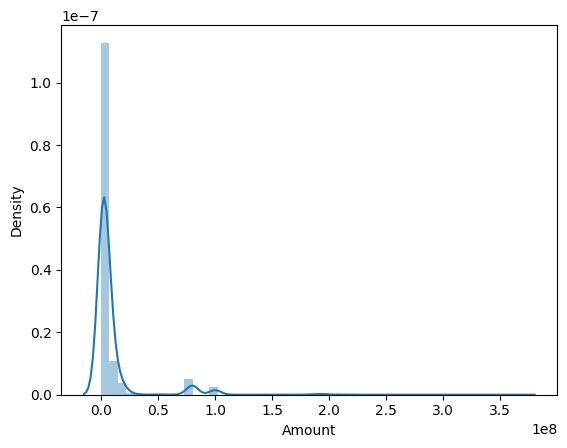

In [73]:
# Get the current distribution plot
sns.distplot(df['Amount'])

- Skewed to the right
- Bell shaped
- Outliers present

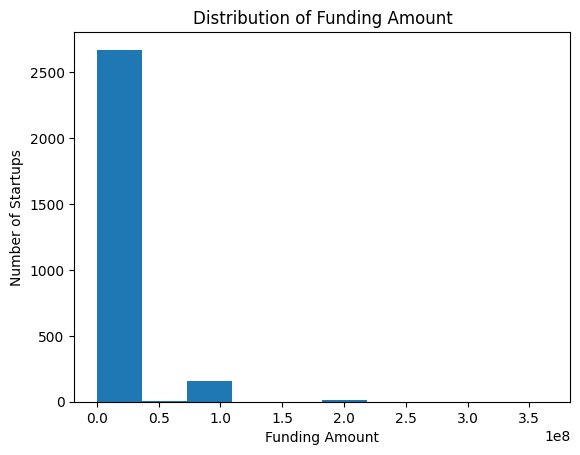

In [98]:
# Distribution of funding amount (Histogram)
plt.hist(df['Amount'])
plt.xlabel('Funding Amount')
plt.ylabel('Number of Startups')
plt.title('Distribution of Funding Amount')
plt.show()

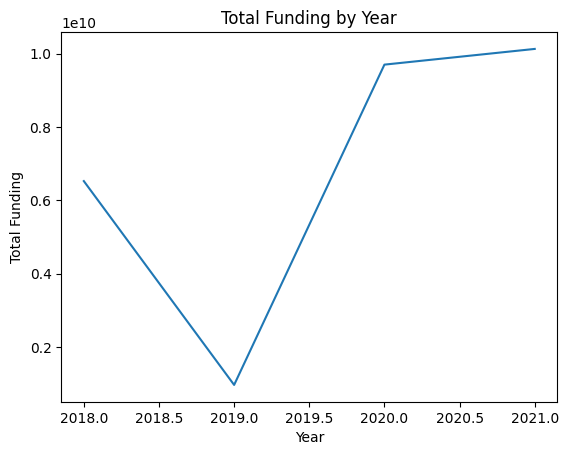

In [99]:
# Funding by Year
# Total funding per year
yearly_funding = df.groupby('Year Funded')['Amount'].sum()

# Time series plot
plt.plot(yearly_funding.index, yearly_funding.values)
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.title('Total Funding by Year')
plt.show()

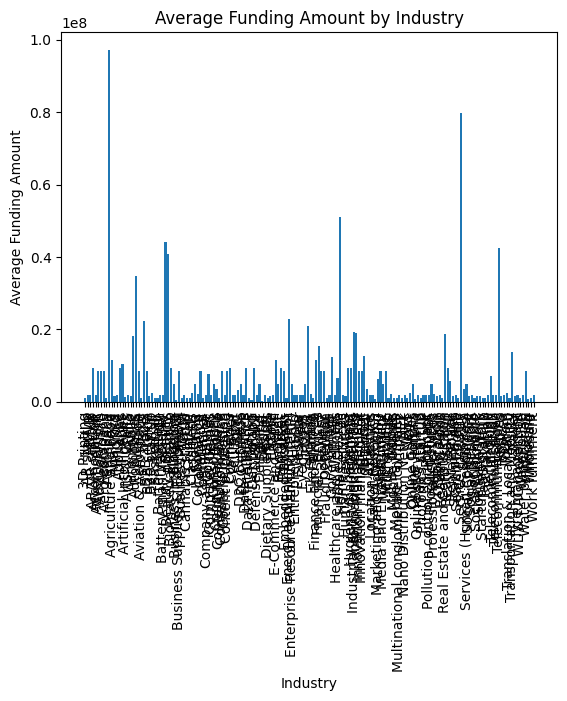

In [101]:
# Funding by Industry
# Group by industry and calculate mean/median funding
industry_stats = df.groupby('Industry')['Amount'].agg(['mean', 'median'])

# Bar chart for average funding per industry
plt.bar(industry_stats.index, industry_stats['mean'])
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount')
plt.title('Average Funding Amount by Industry')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

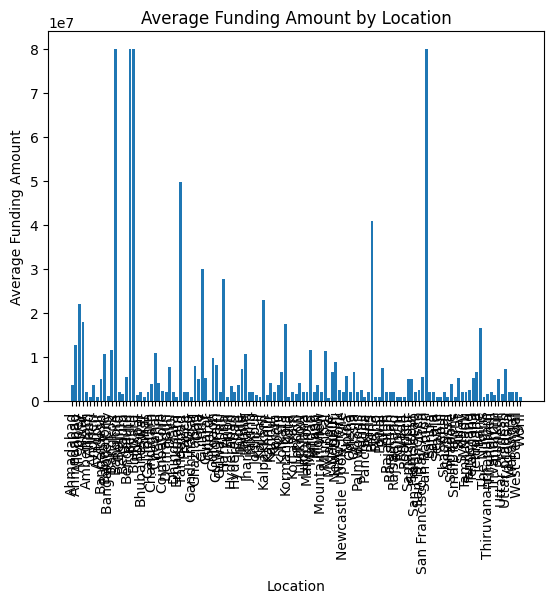

In [103]:
# Funding by Location
# Group by location (city/state/region) and calculate mean/median funding
location_stats = df.groupby('Location')['Amount'].agg(['mean', 'median'])

# Bar chart for average funding per location (adjust as needed)
plt.bar(location_stats.index, location_stats['mean'])
plt.xlabel('Location')
plt.ylabel('Average Funding Amount')
plt.title('Average Funding Amount by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability (if many locations)
plt.show()

#### Outlier Detection

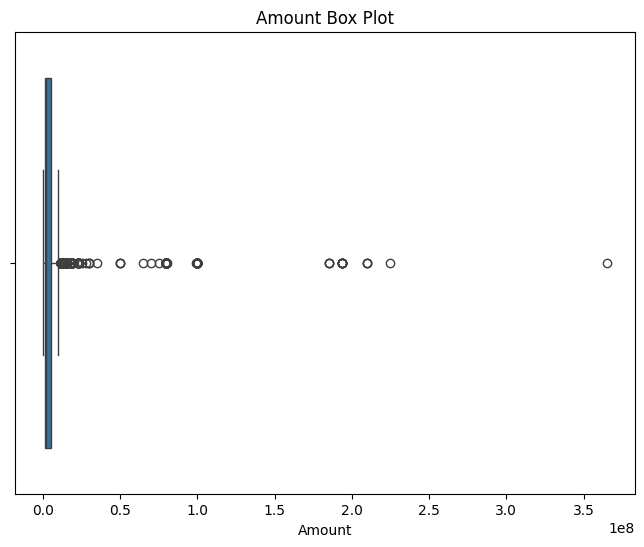

In [75]:
# Use a box plot to visualize the outliers
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Amount'])
plt.title('Amount Box Plot')
plt.xlabel('Amount')
plt.show()

In [76]:
# Identify outliers within the Amount column (using IQR)
KQ1 = df['Amount'].quantile(0.25)  # Calculate 1st quartile of 'Amount'
KQ3 = df['Amount'].quantile(0.75)  # Calculate 3rd quartile of 'Amount'
KIQR = KQ3 - KQ1  # Calculate Interquartile Range

# Identify outliers using IQR
outliersk = df[(df['Amount'] < (KQ1 - 1.5 * KIQR)) | (df['Amount'] > (KQ3 + 1.5 * KIQR))]
print(f"Number of outliers: {len(outliersk)}")

Number of outliers: 425


#### Year Funded

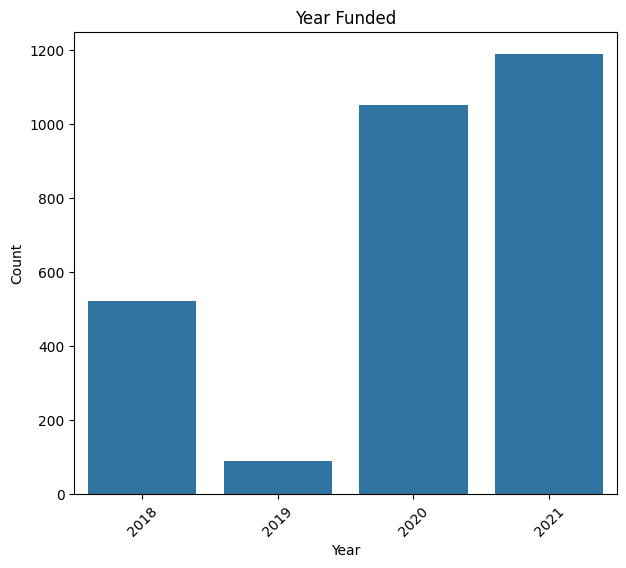

In [79]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'Year Funded', data = df)
plt.title('Year Funded')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45) # Rotate the x-axis for better visibility
plt.show()

#### Funding Stage

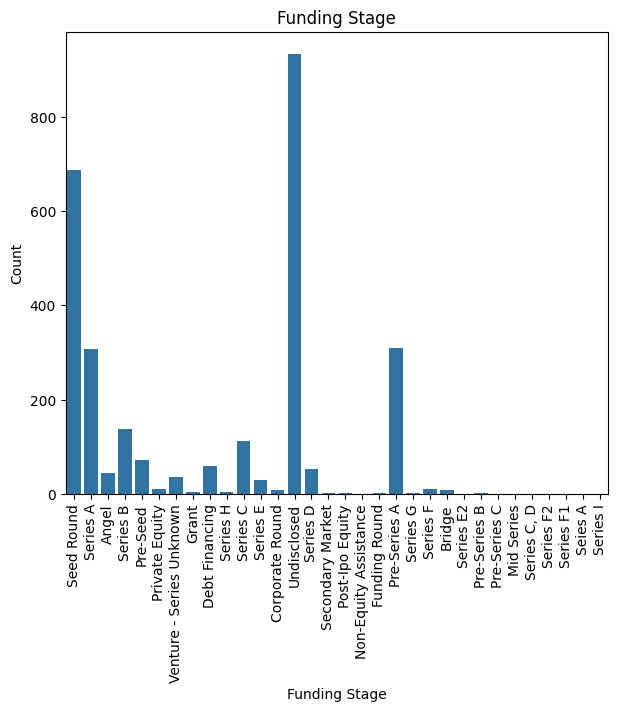

In [84]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'Funding Stage', data = df)
plt.title('Funding Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.xticks(rotation = 90) # Rotate the x-axis for better visibility
plt.show()

#### Year against Average Amount

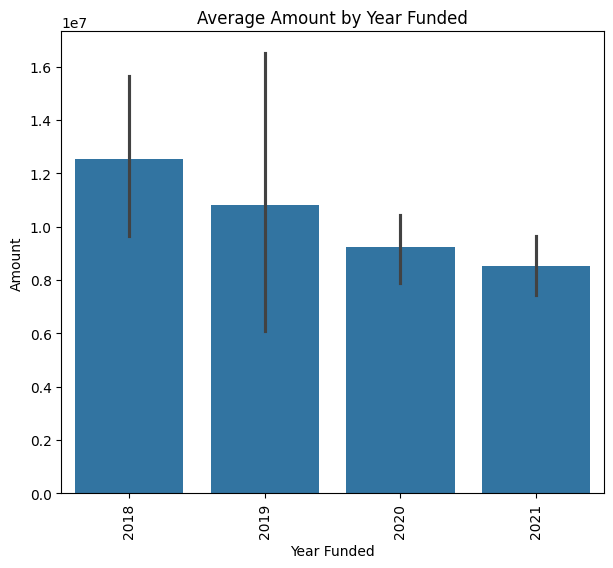

In [85]:
plt.figure(figsize = (7, 6))
sns.barplot(x = 'Year Funded', y = 'Amount', data = df)
plt.title('Average Amount by Year Funded')
plt.xlabel('Year Funded')
plt.ylabel('Amount')
plt.xticks(rotation = 90) 
plt.show()

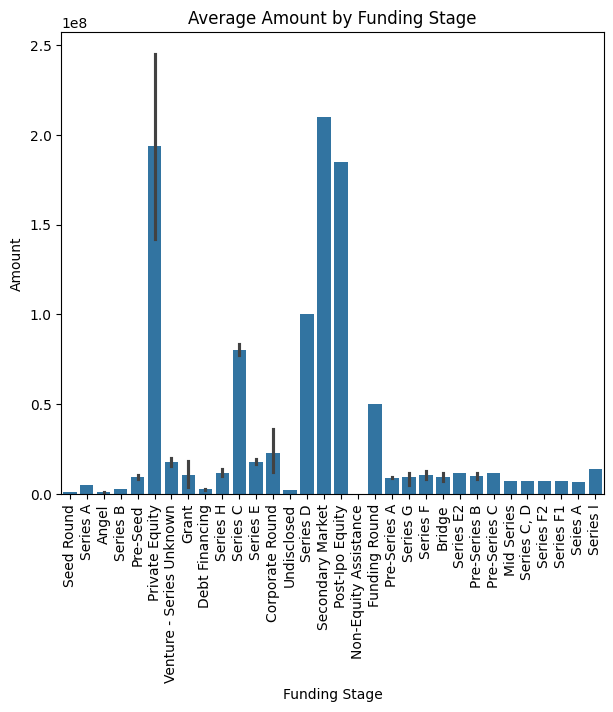

In [86]:
plt.figure(figsize = (7, 6))
sns.barplot(x = 'Funding Stage', y = 'Amount', data = df)
plt.title('Average Amount by Funding Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Amount')
plt.xticks(rotation = 90) 
plt.show()

<Axes: xlabel='Year Funded', ylabel='Count'>

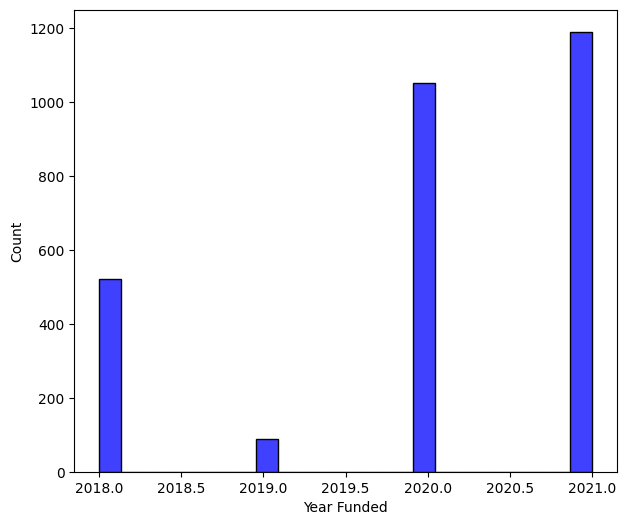

In [90]:
plt.figure(figsize = (7, 6))
sns.histplot(data = df, x = 'Year Funded', color = 'blue')

- More data in 2020 and 2021?????

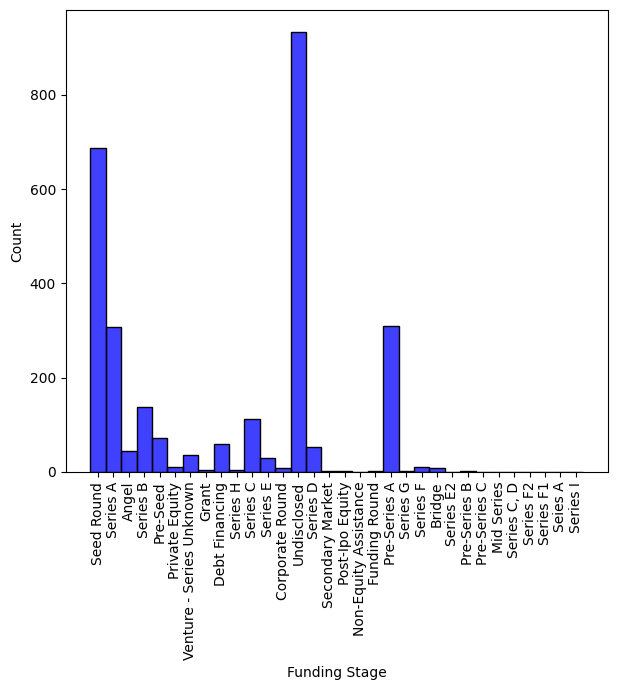

In [94]:
plt.figure(figsize = (7, 6))
sns.histplot(data = df, x = 'Funding Stage', color = 'blue')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Year Funded', ylabel='Amount'>

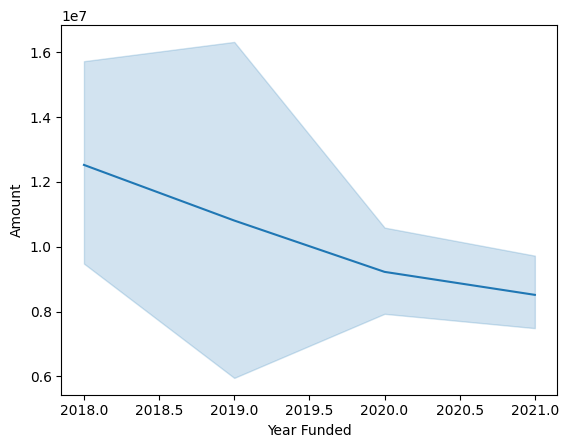

In [96]:
sns.lineplot(x = 'Year Funded', y = 'Amount', data = df)

#### Univariate Analysis

#### Bivariate Analysis

#### Multivariate Analysis

#### Correlation Matrix and Heatmap